Code to study the inflation perturbations $\delta \phi$ during time

In [49]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.optimize import root_scalar
from math import pi

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 12

We consider the perturbations for H=cte and for the H of the potential of the Exercise1.1: $V(\phi) = \lambda \phi^4$

Text(0.5, 1.0, 'Potential')

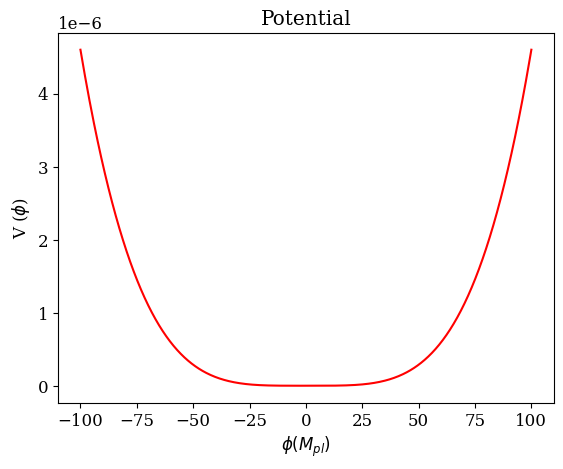

In [50]:
#Potencial of phi⁴
phi = np.linspace(-100,100,500)
lamb = 4.6e-14

V = lambda phi: lamb*np.power(phi,4)
dV = lambda phi: 4*lamb*np.power(phi,3)
ddV = lambda phi: 12*lamb*np.power(phi,2)
c = 4*np.sqrt(lamb/3) #specific for the potencial

#Figure for the potencial given
fig_pot, ax_pot = plt.subplots()

ax_pot.plot(phi,V(phi),color='r', linestyle='-')
ax_pot.set_xlabel(r'$\phi (M_{pl})$')
ax_pot.set_ylabel(r'V ($\phi$)')
ax_pot.set_title('Potential')

Relevant parameters needed throughout the script:

In [51]:
#relevant parameters
H_2 = lambda phi,dphi: 1/3*(1/2*dphi*dphi+V(phi)) #Complete H
dH = lambda dphi: -1/2*dphi*dphi
H_2N = lambda phi,dphiN: V(phi)/(3-dphiN*dphiN/2)

eps = lambda phi,dphi: -dH(dphi)/H_2(phi,dphi)
eta = lambda phi,dphi: 3+dV(phi)/np.sqrt(H_2(phi,dphi))/dphi
epsN = lambda dphiN: dphiN*dphiN/2
etaN = lambda phi, dphiN: 3+dV(phi)/H_2N(phi,dphiN)/dphiN

#slow-roll parameters
eps_v = lambda phi: 1/2*(dV(phi)/V(phi))*(dV(phi)/V(phi))
eta_v = lambda phi: ddV(phi)/V(phi)
HSR_2 = lambda phi: V(phi)/3 #H in slow-roll

#initial values for the slow-roll regime
phiSR_0 = 22
phiSR_e = 2*np.sqrt(2)
dphiSR_0 = -np.sqrt(2*eps_v(phiSR_0)*HSR_2(phiSR_0)) #time
dphiNSR_0 = -np.sqrt(2*eps_v(phiSR_0))

Klein-Gordon equations for the background potencial, respect time and e-folds

In [52]:
def kg_t (t,phi_arr): #complete KG (respect t)
    phi, dphi = phi_arr

    y = dphi
    y_der = -3*np.sqrt(H_2(phi,dphi))*y-dV(phi)

    return [y,y_der]

def kg_N (N,phi_arr): #complete KG (respect N)
    phi, dphi = phi_arr

    y = dphi
    y_der = -(3-epsN(dphi))*y-dV(phi)/H_2N(phi,dphi)

    return [y,y_der]

def end_inflation (t,phiN_arr): #end of inflation
    phiN, dphiN = phiN_arr
    return phiN-phiSR_e
end_inflation.terminal = True
end_inflation.direction = -1

First we consider the inflation background, needed in the equations for the perturbations

Text(0.5, 1.0, 'Inflaton evolution (background)')

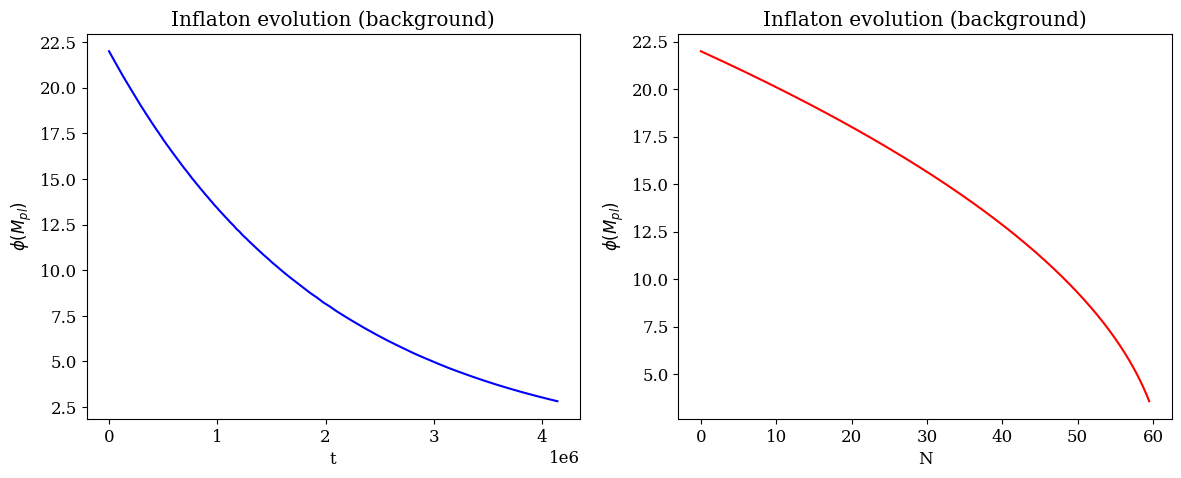

In [53]:
phiSR = np.linspace(phiSR_e,phiSR_0,1000) #slow-roll regime

#with respect time
tSR = -1/c*np.log(phiSR/phiSR_0) #inverse solution of KG slow-roll
tSR_0 = tSR[-1]
tSR_end = tSR[0]

# numerical integration respect time
t_0 = 0
t_end = tSR_end
t_eval = np.linspace(t_0,t_end,1000)
t_span = np.array([t_0,t_end])
phi_arr_0 = [phiSR_0, dphiSR_0]
sol = solve_ivp(kg_t,t_span, phi_arr_0, dense_output=True, events=end_inflation)
phi = sol.sol(t_eval)[0]
dphi = sol.sol(t_eval)[1]

#numerical integration respect e-folds 
N_0 = 0
N_end = (phiSR_0*phiSR_0-phiSR_e*phiSR_e)/8
N_eval = np.linspace(N_0, N_end,1000)
N_span = np.array([N_0,N_end])
phiN_arr_0 = [phiSR_0, dphiNSR_0]
sol_back = solve_ivp(kg_N,N_span, phiN_arr_0, dense_output=True, events=end_inflation)
phiN = sol_back.sol(N_eval)[0]
dphiN = sol_back.sol(N_eval)[1]

#Figure for the inflaton (background)
fig_phi = plt.figure()
fig_phi.set_figheight(5)
fig_phi.set_figwidth(14)

ax_phi = plt.subplot(1,2,1)
ax_phiN = plt.subplot(1,2,2)

ax_phi.plot(t_eval,phi,color='b', linestyle='-')
ax_phi.set_xlabel(r't')
ax_phi.set_ylabel(r'$\phi (M_{pl})$')
ax_phi.set_title('Inflaton evolution (background)')

ax_phiN.plot(N_eval,phiN,color='r', linestyle='-')
ax_phiN.set_xlabel(r'N')
ax_phiN.set_ylabel(r'$\phi (M_{pl})$')
ax_phiN.set_title('Inflaton evolution (background)')

We can also plot the different parameters, $\epsilon = H'/H^2$ and $\eta = \phi''/(H \phi')$

Text(0.5, 1.0, '$\\eta$ parameter')

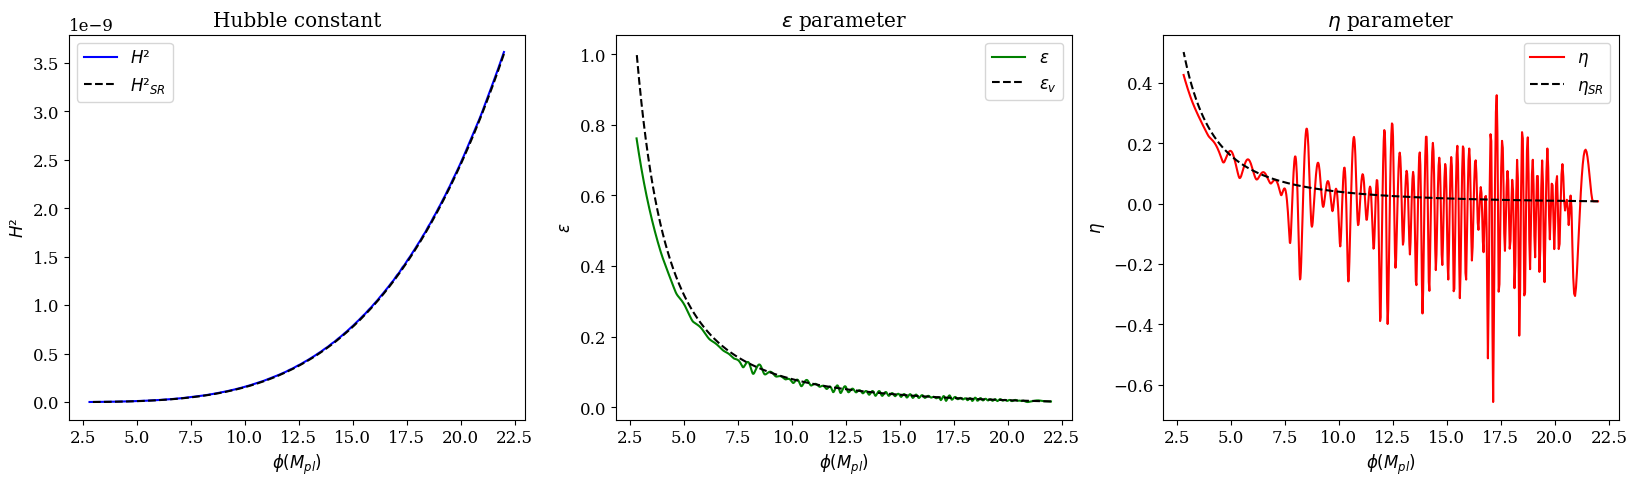

In [54]:
#FIGURES
fig_par = plt.figure()
fig_par.set_figheight(5)
fig_par.set_figwidth(20)

#plot H²
ax_H2 = plt.subplot(1,3,1)
ax_H2.plot(phi,H_2(phi,dphi),color='b', linestyle='-', label=r'$H²$')
ax_H2.plot(phi,HSR_2(phi),color='k', linestyle='--', label=r'$H²_{SR}$')
ax_H2.set_xlabel(r'$\phi (M_{pl})$')
ax_H2.set_ylabel(r'$H²$')
ax_H2.set_ylim()
ax_H2.legend()
ax_H2.set_title('Hubble constant')

#plot eps parameter
ax_eps = plt.subplot(1,3,2)
ax_eps.plot(phi,eps(phi,dphi),color='g', linestyle='-', label=r'$\varepsilon$')
ax_eps.plot(phi,eps_v(phi),color='k', linestyle='--', label=r'$\epsilon_v$')
ax_eps.set_xlabel(r'$\phi (M_{pl})$')
ax_eps.set_ylabel(r'$\epsilon$')
ax_eps.legend()
ax_eps.set_title(r'$\epsilon$ parameter')

#plot eta parameter
eta_SR = eta_v(phi)-eps_v(phi)

ax_eta = plt.subplot(1,3,3)
ax_eta.plot(phi,eta(phi,dphi),color='r', linestyle='-', label=r'$\eta$')
ax_eta.plot(phi,eta_SR,color='k', linestyle='--', label=r'$\eta_{SR}$')
ax_eta.set_xlabel(r'$\phi (M_{pl})$')
ax_eta.set_ylabel(r'$\eta$')
ax_eta.legend()
ax_eta.set_title('$\eta$ parameter')

Now we consider the inflaton perturbations

In [55]:
#initial conditions (reference)
H = np.sqrt(H_2N(phiSR_0,dphiNSR_0))
k_pivot = 1e-4
a_pivot = k_pivot/H
aH_pivot = k_pivot/np.sqrt(H_2N(phiSR_0,dphiNSR_0))

a = lambda a_0,N: a_0*np.exp(N)

#root finding k=aH
def root_k(N,k):
    phi = sol_back.sol(N)[0]
    dphi = sol_back.sol(N)[1]

    root = np.exp(N)-k/(aH_pivot*np.sqrt(H_2N(phi,dphi)))

    return root

#initial conditions for perturbations
def num_int_pert(k):
    k_i = k/100
    if k_i<k_pivot:
        print('ERROR MESSAGE: k_i<k_pivot')
    N_eq = np.log(k/a_pivot/H) #moment when k=aH
    sol_zeros = root_scalar(root_k, args=[k], bracket=[0,N_end], method='brentq')
    N_eqH = sol_zeros.root

    N_i = np.log(k_i/a_pivot/H)
    a_i = k_i/H #initial condition for a

    sol_zeros = root_scalar(root_k, args=[k_i], bracket=[0,N_end], method='brentq')
    N_iH = sol_zeros.root
    a_iH =  a(aH_pivot,N_iH) #initial condition for H

    # numerical integration arrays
    N_span = np.array([N_i,N_eq+10])
    N_spanH = np.array([N_iH,N_eqH+10])

    return [a_i,a_iH,N_i,N_iH,N_eq,N_eqH,N_span,N_spanH]

Firstly we write the differential equations needed to plot the different variables. We define $R=(H/\phi) \delta \phi$

In [56]:
def phiSR_perturbations (N,delta_phi_arr, k,H): #perturbations for slow-roll with constant H
    delta_phi, delta_dphi = delta_phi_arr

    y = delta_dphi
    y_der = -3*y-k*k/(a(a_pivot,N)*a(a_pivot,N)*H*H)*delta_phi

    return [y,y_der]

def MSN_cte (N,u_arr, k,H): #mukhanov-sasaki equation for H=cte
    u, du = u_arr

    y = du
    y_der = -y-(k*k/(a(a_pivot,N)*a(a_pivot,N)*H*H)-2)*u

    return [y,y_der]

def R_pert_cte (N,R_arr, k,H): #equation for the comoving curvature perturbation (H=cte)
    R, dR = R_arr

    y = dR
    y_der = -3*y-k*k/(a(a_pivot,N)*a(a_pivot,N)*H*H)*R

    return [y,y_der]

def phi_perturbations (N,delta_phi_arr, k):
    delta_phi, delta_dphi = delta_phi_arr
    phi_back = sol_back.sol(N)[0]
    dphiN_back = sol_back.sol(N)[1]

    y = delta_dphi
    y_der = -(3-epsN(dphiN_back))*y-k*k/(a(aH_pivot,N)*a(aH_pivot,N)*H_2N(phi_back, dphiN_back))*delta_phi
    -(ddV(phi_back)/H_2N(phi_back,dphiN_back)-2*epsN(dphiN_back)*(3+epsN(dphiN_back)-2*etaN(phi_back,dphiN_back)))*delta_phi

    return [y,y_der]

def MSN (N,u_arr, k): #mukhanov-sasaki equation for generic H
    u, du = u_arr
    phi_back = sol_back.sol(N)[0]
    dphiN_back = sol_back.sol(N)[1]

    y = du
    y_der = -(1-epsN(dphiN_back))*y-(k*k/(a(aH_pivot,N)*a(aH_pivot,N)*H_2N(phi_back, dphiN_back))
            +ddV(phi_back)/H_2N(phi_back,dphiN_back)-2*epsN(dphiN_back)*(3+epsN(dphiN_back)-2*etaN(phi_back,dphiN_back))-(2-epsN(dphiN_back)))*u

    return [y,y_der]

def R_pert (N,R_arr, k): #equation for the comoving curvature perturbation
    R, dR = R_arr
    phi_back = sol_back.sol(N)[0]
    dphiN_back = sol_back.sol(N)[1]

    y = dR
    y_der = -(3+epsN(dphiN_back)-2*etaN(phi_back,dphiN_back))*y-k*k/(a(aH_pivot,N)*a(aH_pivot,N)*H_2N(phi_back, dphiN_back))*R

    return [y,y_der]


We use the Bunch-Davies boundary conditions, defined for $u=zR = a \delta \phi$ with $z=(a/H)\phi'$. There can be written like: 

$Re[u] = 1/\sqrt{2k}$ ; $Im[u] = 0$ ; $Re[du/dN] = 0$ ; $Im[du/dN] = -\sqrt{k}/(\sqrt{2}k_i)$

In [57]:
k = 0.05
a_i,a_iH,N_i,N_iH,N_eq,N_eqH,N_span,N_spanH = num_int_pert(k)
N_eval = np.linspace(N_span[0],N_span[-1],5000)
N_evalH = np.linspace(N_spanH[0],N_spanH[-1],5000)

#for u
u_0_RE = lambda k: 1/np.sqrt(2*k)
du_0_RE = lambda k: 0
u_0_IM = lambda k: 0
du_0_IM = lambda k: -np.sqrt(k/2)/(k/100)

#for delta phi
delta_phi_0_RE = lambda k,ai: u_0_RE(k)/ai
delta_dphi_0_RE = lambda k,ai: (du_0_RE(k)-u_0_RE(k))/ai
delta_phi_0_IM = lambda k,ai,:u_0_IM(k)/ai
delta_dphi_0_IM = lambda k,ai: (du_0_IM(k)-u_0_IM(k))/ai

#for R
def z_i(ai,Ni):
    dphi = sol_back.sol(Ni)[1]
    zi = dphi*ai
    return zi
R_0_RE = lambda k,ai,Ni: u_0_RE(k)/z_i(ai,Ni)
dR_0_RE = lambda k,ai,Ni: (du_0_RE(k)-u_0_RE(k))/z_i(ai,Ni)
R_0_IM = lambda k,ai,Ni: u_0_IM(k)/z_i(ai,Ni)
dR_0_IM = lambda k,ai,Ni: (du_0_IM(k)-u_0_IM(k))/z_i(ai,Ni)

#tolerances
rtol_pert = 1e-8
atol_pert = 1e-8

From the perturbation equation, we can plot $\delta \phi$, for H=cte and for $H(V=\phi^4)$

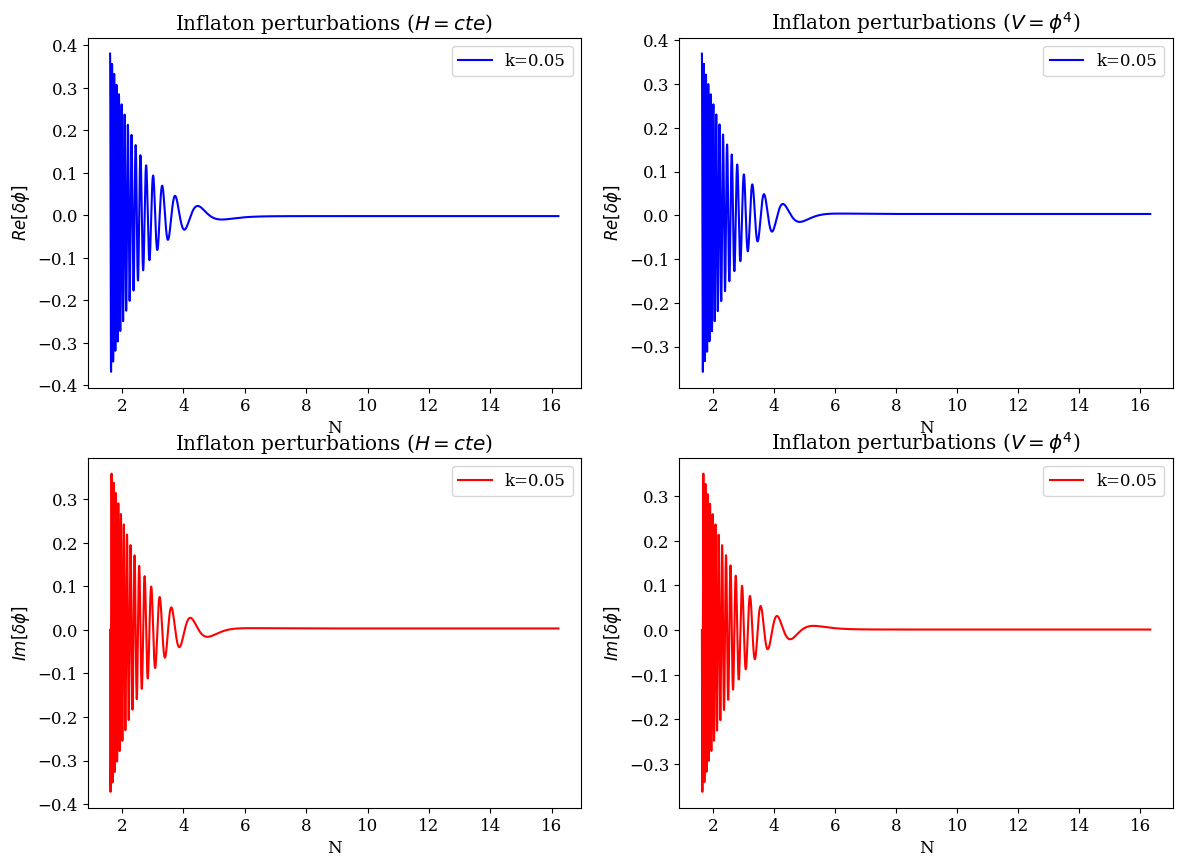

In [58]:
#Figure for the inflation perturbations
fig_phi = plt.figure()
fig_phi.set_figheight(10)
fig_phi.set_figwidth(14)
ax_phi_RE = plt.subplot(2,2,1)
ax_phiH_RE = plt.subplot(2,2,2)
ax_phi_IM = plt.subplot(2,2,3)
ax_phiH_IM = plt.subplot(2,2,4)

#initial conditions
deltaphi_arr_0_RE = [delta_phi_0_RE(k,a_i), delta_dphi_0_RE(k,a_i)]
deltaphi_arr_0_IM = [delta_phi_0_IM(k,a_i), delta_dphi_0_IM(k,a_i)]
deltaphiH_arr_0_RE = [delta_phi_0_RE(k,a_iH), delta_dphi_0_RE(k,a_iH)]
deltaphiH_arr_0_IM = [delta_phi_0_IM(k,a_iH), delta_dphi_0_IM(k,a_iH)]

sol_pert_RE = solve_ivp(phiSR_perturbations,N_span, deltaphi_arr_0_RE, dense_output=True, args=[k,H], rtol=rtol_pert, atol=atol_pert)
sol_pert_IM = solve_ivp(phiSR_perturbations,N_span, deltaphi_arr_0_IM, dense_output=True, args=[k,H], rtol=rtol_pert, atol=atol_pert)
sol_pertH_RE = solve_ivp(phi_perturbations,N_spanH, deltaphiH_arr_0_RE, dense_output=True, args=[k], rtol=rtol_pert, atol=atol_pert)
sol_pertH_IM = solve_ivp(phi_perturbations,N_spanH, deltaphiH_arr_0_IM, dense_output=True, args=[k], rtol=rtol_pert, atol=atol_pert)

delta_phi_RE = np.array([sol_pert_RE.sol(N_eval)[0], sol_pertH_RE.sol(N_evalH)[0]])
delta_dphi_RE = np.array([sol_pert_RE.sol(N_eval)[1], sol_pertH_RE.sol(N_evalH)[1]])
delta_phi_IM = np.array([sol_pert_IM.sol(N_eval)[0], sol_pertH_IM.sol(N_evalH)[0]])
delta_dphi_IM = np.array([sol_pert_IM.sol(N_eval)[1], sol_pertH_IM.sol(N_evalH)[1]])

ax_phi_RE.plot(N_eval,delta_phi_RE[0], color='b', linestyle='-', label='k=%.2f'%k)
#ax_phi_RE.plot(N_eq_arr, N_eq_arry, color='k', linestyle='--', label='k=aH')
ax_phi_IM.plot(N_eval,delta_phi_IM[0], color='r', linestyle='-', label='k=%.2f'%k)
#ax_phi_IM.plot(N_eq_arr, N_eq_arry, color='k', linestyle='--', label='k=aH')

ax_phiH_RE.plot(N_evalH,delta_phi_RE[1], color='b', linestyle='-', label='k=%.2f'%k)
ax_phiH_IM.plot(N_evalH,delta_phi_IM[1], color='r', linestyle='-', label='k=%.2f'%k)

ax_phi_RE.set_xlabel(r'N')
ax_phi_RE.set_ylabel(r'$Re[\delta\phi]$')
ax_phi_RE.set_title('Inflaton perturbations ($H = cte$)')
ax_phi_RE.legend()

ax_phi_IM.set_xlabel(r'N')
ax_phi_IM.set_ylabel(r'$Im[\delta\phi]$')
ax_phi_IM.set_title('Inflaton perturbations ($H = cte$)')
ax_phi_IM.legend()

ax_phiH_RE.set_xlabel(r'N')
ax_phiH_RE.set_ylabel(r'$Re[\delta\phi]$')
ax_phiH_RE.set_title('Inflaton perturbations ($V = \phi^4$)')
ax_phiH_RE.legend()

ax_phiH_IM.set_xlabel(r'N')
ax_phiH_IM.set_ylabel(r'$Im[\delta\phi]$')
ax_phiH_IM.set_title('Inflaton perturbations ($V = \phi^4$)')
ax_phiH_IM.legend()

We compute the Mukhanov-Sasaki equation for the variable $u$

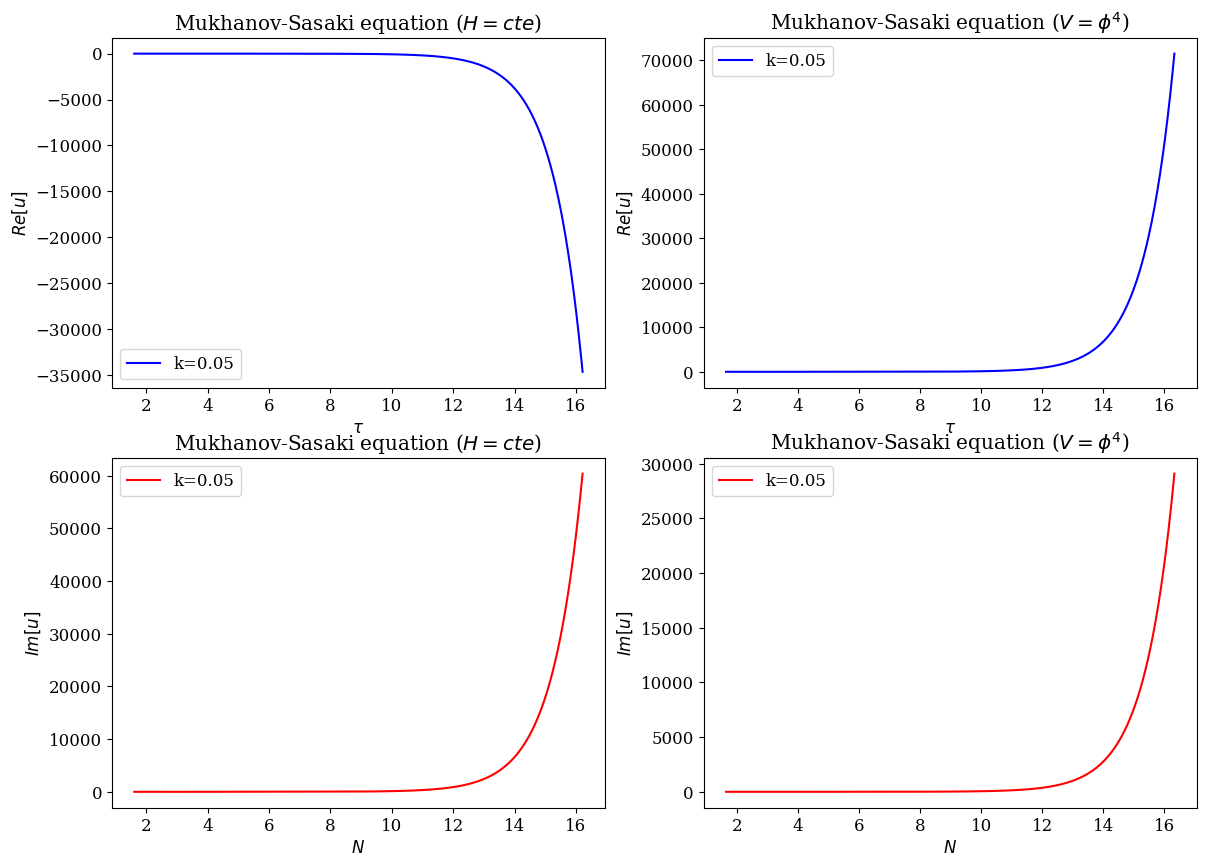

In [59]:
#Figure for u
fig_u = plt.figure()
fig_u.set_figheight(10)
fig_u.set_figwidth(14)
ax_u_RE = plt.subplot(2,2,1)
ax_uH_RE = plt.subplot(2,2,2)
ax_u_IM = plt.subplot(2,2,3)
ax_uH_IM = plt.subplot(2,2,4)

uarr_0_RE = [u_0_RE(k),du_0_RE(k)]
uarr_0_IM = [u_0_IM(k),du_0_IM(k)]
uarrH_0_RE = [u_0_RE(k),du_0_RE(k)]
uarrH_0_IM = [u_0_IM(k),du_0_IM(k)]

solu_RE = solve_ivp(MSN_cte,N_span, uarr_0_RE, dense_output=True, args=[k,H], rtol=rtol_pert, atol=atol_pert)
solu_IM = solve_ivp(MSN_cte,N_span, uarr_0_IM, dense_output=True, args=[k,H], rtol=rtol_pert, atol=atol_pert)
soluH_RE = solve_ivp(MSN,N_spanH, uarrH_0_RE, dense_output=True, args=[k], rtol=rtol_pert, atol=atol_pert)
soluH_IM = solve_ivp(MSN,N_spanH, uarrH_0_IM, dense_output=True, args=[k], rtol=rtol_pert, atol=atol_pert)

u_RE = np.array([solu_RE.sol(N_eval)[0],soluH_RE.sol(N_evalH)[0]])
du_RE = np.array([solu_RE.sol(N_eval)[1],soluH_RE.sol(N_evalH)[1]])
u_IM = np.array([solu_IM.sol(N_eval)[0],soluH_IM.sol(N_evalH)[0]])
du_IM = np.array([solu_IM.sol(N_eval)[1],soluH_IM.sol(N_evalH)[1]])

ax_u_RE.plot(N_eval,u_RE[0],color='b',linestyle='-', label='k=%.2f'%k)
ax_u_IM.plot(N_eval,u_IM[0],color='r',linestyle='-', label='k=%.2f'%k)

ax_uH_RE.plot(N_evalH,u_RE[1],color='b',linestyle='-', label='k=%.2f'%k)
ax_uH_IM.plot(N_evalH,u_IM[1],color='r',linestyle='-', label='k=%.2f'%k)

ax_u_RE.set_xlabel(r'$\tau$')
ax_u_RE.set_ylabel(r'$Re[u]$')
ax_u_RE.set_title(r'Mukhanov-Sasaki equation ($H=cte$)')
ax_u_RE.legend()

ax_u_IM.set_xlabel(r'$N$')
ax_u_IM.set_ylabel(r'$Im[u]$')
ax_u_IM.set_title(r'Mukhanov-Sasaki equation ($H=cte$)')
ax_u_IM.legend()

ax_uH_RE.set_xlabel(r'$\tau$')
ax_uH_RE.set_ylabel(r'$Re[u]$')
ax_uH_RE.set_title(r'Mukhanov-Sasaki equation ($V = \phi^4$)')
ax_uH_RE.legend()

ax_uH_IM.set_xlabel(r'$N$')
ax_uH_IM.set_ylabel(r'$Im[u]$')
ax_uH_IM.set_title(r'Mukhanov-Sasaki equation ($V = \phi^4$)')
ax_uH_IM.legend()

Now we plot the results for $R$

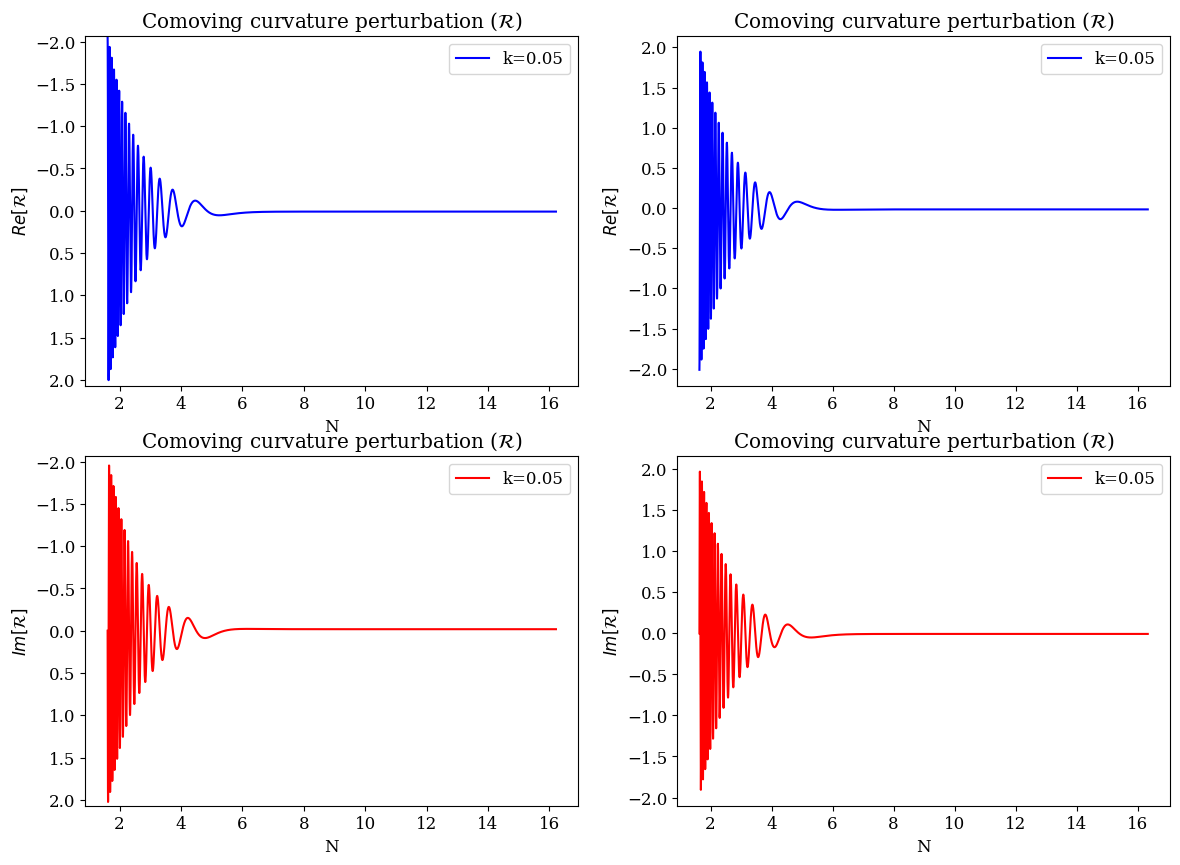

In [60]:
#Figure for R
fig_R = plt.figure()
fig_R.set_figheight(10)
fig_R.set_figwidth(14)
ax_R_RE = plt.subplot(2,2,1)
ax_RH_RE = plt.subplot(2,2,2)
ax_R_IM = plt.subplot(2,2,3)
ax_RH_IM = plt.subplot(2,2,4)

Rarr_0_RE = [R_0_RE(k,a_i,N_i), dR_0_RE(k,a_i,N_i)]
Rarr_0_IM = [R_0_IM(k,a_i,N_i), dR_0_IM(k,a_i,N_i)]
RarrH_0_RE = [R_0_RE(k,a_iH,N_iH), dR_0_RE(k,a_iH,N_iH)]
RarrH_0_IM = [R_0_IM(k,a_iH,N_iH), dR_0_IM(k,a_iH,N_iH)]

sol_R_RE = solve_ivp(R_pert_cte,N_span, Rarr_0_RE, dense_output=True, args=[k,H], rtol=rtol_pert, atol=atol_pert)
sol_R_IM = solve_ivp(R_pert_cte,N_span, Rarr_0_IM, dense_output=True, args=[k,H], rtol=rtol_pert, atol=atol_pert)
sol_RH_RE = solve_ivp(R_pert,N_spanH, RarrH_0_RE, dense_output=True, args=[k], rtol=rtol_pert, atol=atol_pert)
sol_RH_IM = solve_ivp(R_pert,N_spanH, RarrH_0_IM, dense_output=True, args=[k], rtol=rtol_pert, atol=atol_pert)

R_RE = np.array([sol_R_RE.sol(N_eval)[0], sol_RH_RE.sol(N_evalH)[0]]) 
dR_RE = np.array([sol_R_RE.sol(N_eval)[1], sol_RH_RE.sol(N_evalH)[1]])
R_IM = np.array([sol_R_IM.sol(N_eval)[0], sol_RH_IM.sol(N_evalH)[0]])
dR_IM = np.array([sol_R_IM.sol(N_eval)[1], sol_RH_IM.sol(N_evalH)[1]])

ax_R_RE.plot(N_eval,R_RE[0],color='b',linestyle='-', label='k=%.2f'%k)
#ax_R_RE.plot(N_eq_arr, N_eq_arry, color='k', linestyle='--', label='k=aH')
ax_R_IM.plot(N_eval,R_IM[0],color='r',linestyle='-', label='k=%.2f'%k)
#ax_R_IM.plot(N_eq_arr, N_eq_arry, color='k', linestyle='--', label='k=aH')

ax_RH_RE.plot(N_evalH,R_RE[1],color='b',linestyle='-', label='k=%.2f'%k)
ax_RH_IM.plot(N_evalH,R_IM[1],color='r',linestyle='-', label='k=%.2f'%k)

ax_R_RE.set_xlabel(r'N')
ax_R_RE.set_ylabel(r'$Re[\mathcal{R}]$')
ax_R_RE.set_title('Comoving curvature perturbation ($\mathcal{R}$)')
ax_R_RE.set_ylim([-R_0_RE(k,a_i,N_i), R_0_RE(k,a_i,N_i)])
ax_R_RE.legend()

ax_R_IM.set_xlabel(r'N')
ax_R_IM.set_ylabel(r'$Im[\mathcal{R}]$')
ax_R_IM.set_title('Comoving curvature perturbation ($\mathcal{R}$)')
ax_R_IM.set_ylim([-R_0_RE(k,a_i,N_i), R_0_RE(k,a_i,N_i)])
ax_R_IM.legend()

ax_RH_RE.set_xlabel(r'N')
ax_RH_RE.set_ylabel(r'$Re[\mathcal{R}]$')
ax_RH_RE.set_title('Comoving curvature perturbation ($\mathcal{R}$)')
ax_RH_RE.legend()

ax_RH_IM.set_xlabel(r'N')
ax_RH_IM.set_ylabel(r'$Im[\mathcal{R}]$')
ax_RH_IM.set_title('Comoving curvature perturbation ($\mathcal{R}$)')
ax_RH_IM.legend()

Figure to use in the memory

#Figure for the memory
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)
ax_u = plt.subplot(1,2,1)
ax = plt.subplot(1,2,2)

#comoving radius
N_eqH_arr = N_eqH*np.ones(500)
cr = np.linspace(-50,1000,500)

ax_u.plot(N_evalH,u_IM[1],color='r', alpha=0.75, linestyle='-', label='$u$ at $k=0.05 \mathrm{Mpc^{-1}}$')
ax_u.plot(N_eqH_arr,cr,color='k', linestyle='--', label='$k=aH$')
ax_u.set_xlabel(r'$N$', size=14)
ax_u.set_ylabel(r'Im$[u]$', size=14)
ax_u.set_ylim([-50,800])
ax_u.set_title('Mukhanov-Sasaki variable ($u$)', size=18)
ax_u.legend(fontsize=15, loc='upper left')

ax.plot(N_evalH,R_IM[1],color='b', alpha=0.75, linestyle='-', label='$\mathcal{R}$ at $k=0.05 \mathrm{Mpc^{-1}}$')
ax.plot(N_eqH_arr,cr,color='k', linestyle='--', label='$k=aH$')
ax.set_xlabel(r'$N$', size=14)
ax.set_ylabel(r'Im$[\mathcal{R}]$', size=14)
ax.set_ylim([-1.7,1.7])
ax.set_title('Comoving curvature perturbation ($\mathcal{R}$)', size=18)
ax.legend(fontsize=15, loc='lower right')

fig.savefig('R_perturbation.png')

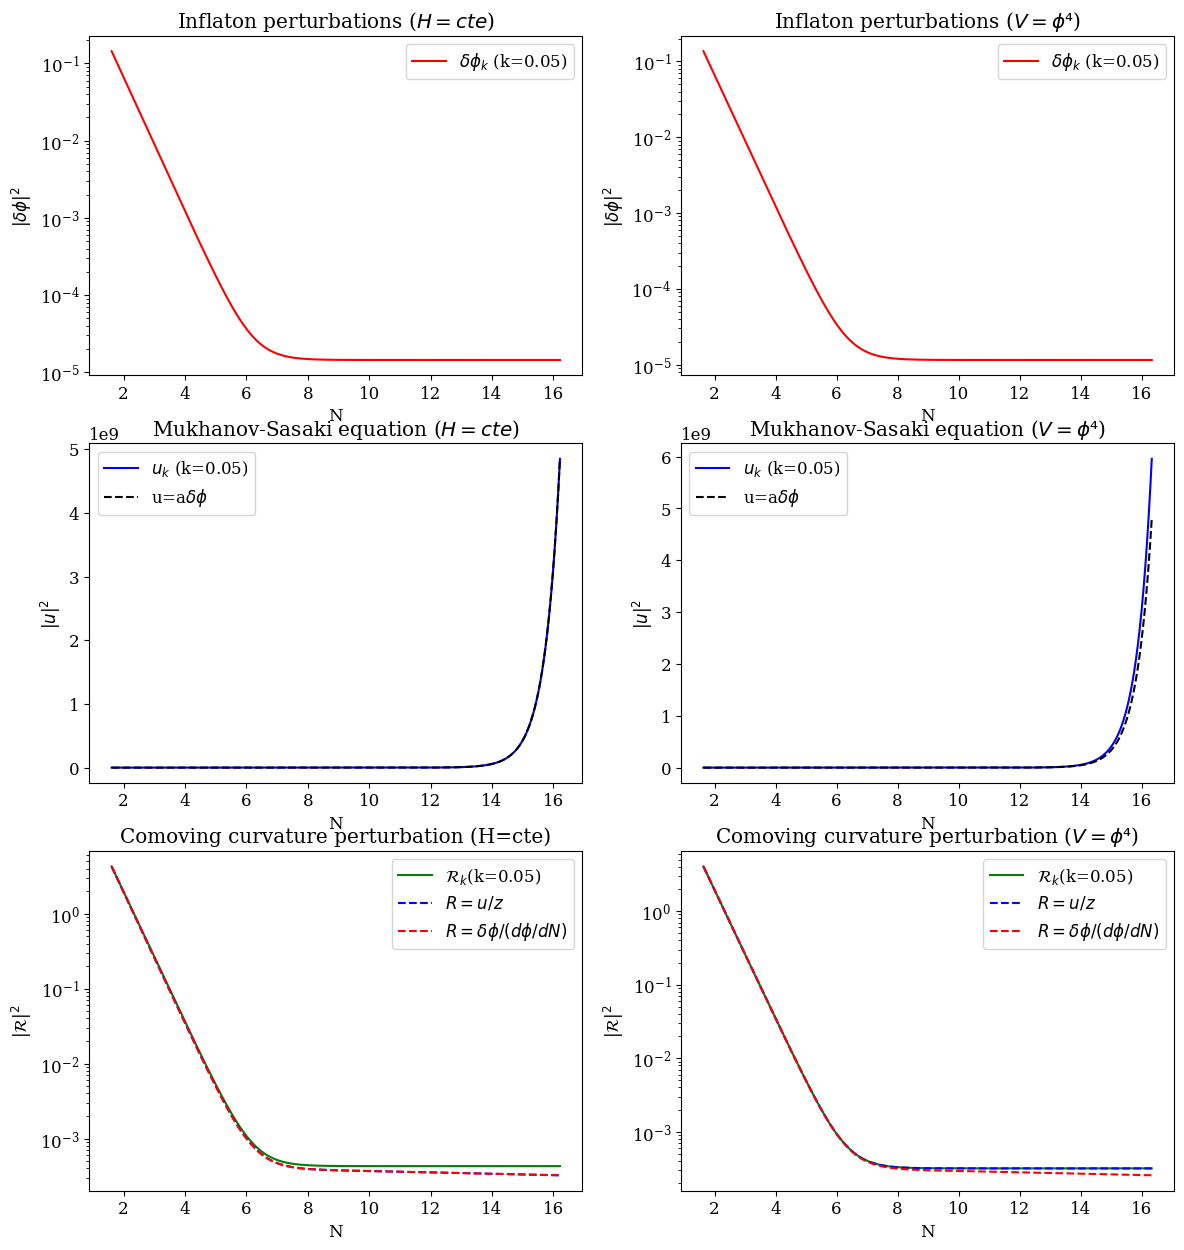

In [61]:
#Figure for modulus of the variables
fig_mod = plt.figure()
fig_mod.set_figheight(15)
fig_mod.set_figwidth(14)
ax_deltaphi = plt.subplot(3,2,1)
ax_deltaphiH = plt.subplot(3,2,2)
ax_u = plt.subplot(3,2,3)
ax_uH = plt.subplot(3,2,4)
ax_R = plt.subplot(3,2,5)
ax_RH = plt.subplot(3,2,6)

delta_phi_mod2 = delta_phi_RE*delta_phi_RE+delta_phi_IM*delta_phi_IM #delta phi modulus
umod2 = u_RE*u_RE+u_IM*u_IM
R_mod2 = R_RE*R_RE+R_IM*R_IM

#other ways to get u and R
a_eval = np.array([a(a_pivot,N_eval),a(aH_pivot,N_evalH)])
u_phi = [a_eval[0]*a_eval[0]*delta_phi_mod2[0], 
         a_eval[1]*a_eval[1]*delta_phi_mod2[1]] #u from u=a delta_phi

dphiN_eval = np.array([sol_back.sol(N_eval)[1],sol_back.sol(N_evalH)[1]])
#R from R=u/z
z = dphiN_eval*a_eval
R_u = umod2/z/z
#R from R=delta_phi/dphiN
R_phi = delta_phi_mod2/dphiN_eval/dphiN_eval

ax_deltaphi.semilogy(N_eval,delta_phi_mod2[0], color='r', linestyle='-', label='$\delta \phi_k$ (k=%.2f)'%k)
#ax_deltaphi.plot(N_eq_arr, N_eq_arry, color='k', linestyle='--', label='k=aH')
ax_deltaphiH.semilogy(N_evalH,delta_phi_mod2[1], color='r', linestyle='-', label='$\delta \phi_k$ (k=%.2f)'%k)

ax_u.plot(N_eval,umod2[0],color='b',linestyle='-', label='$u_k$ (k=%.2f)'%k)
ax_u.plot(N_eval,u_phi[0],color='k',linestyle='--', label='u=a$\delta \phi$')
ax_uH.plot(N_evalH,umod2[1],color='b',linestyle='-', label='$u_k$ (k=%.2f)'%k)
ax_uH.plot(N_evalH,u_phi[1],color='k',linestyle='--', label='u=a$\delta \phi$')

ax_R.semilogy(N_eval,R_mod2[0],color='g',linestyle='-', label='$\mathcal{R}_k$(k=%.2f)'%k)
ax_R.plot(N_eval,R_u[0], color='b',linestyle='--', label='$R=u/z$')
ax_R.plot(N_eval,R_phi[0], color='r',linestyle='--', label='$R=\delta \phi/(d\phi/dN)$')
#ax_R.plot(N_eq_arr, N_eq_arry, color='k', linestyle='--', label='k=aH')
ax_RH.semilogy(N_evalH,R_mod2[1],color='g',linestyle='-', label='$\mathcal{R}_k$(k=%.2f)'%k)
ax_RH.semilogy(N_evalH,R_u[1], color='b',linestyle='--', label='$R=u/z$')
ax_RH.plot(N_evalH,R_phi[1], color='r',linestyle='--', label='$R=\delta \phi/(d\phi/dN)$')

ax_deltaphi.set_xlabel(r'N')
ax_deltaphi.set_ylabel(r'$|\delta\phi|^2$')
ax_deltaphi.set_title('Inflaton perturbations ($H = cte$)')
ax_deltaphi.legend()

ax_u.set_xlabel(r'N')
ax_u.set_ylabel(r'$|u|^2$')
ax_u.set_title(r'Mukhanov-Sasaki equation ($H=cte$)')
ax_u.legend()

ax_R.set_xlabel(r'N')
ax_R.set_ylabel(r'$|\mathcal{R}|^2$')
ax_R.set_title('Comoving curvature perturbation (H=cte)')
ax_R.legend()

ax_deltaphiH.set_xlabel(r'N')
ax_deltaphiH.set_ylabel(r'$|\delta\phi|^2$')
ax_deltaphiH.set_title('Inflaton perturbations ($V=\phi⁴$)')
ax_deltaphiH.legend()

ax_uH.set_xlabel(r'N')
ax_uH.set_ylabel(r'$|u|^2$')
ax_uH.set_title(r'Mukhanov-Sasaki equation ($V=\phi⁴$)')
ax_uH.legend()

ax_RH.set_xlabel(r'N')
ax_RH.set_ylabel(r'$|\mathcal{R}|^2$')
ax_RH.set_title('Comoving curvature perturbation ($V=\phi⁴$)')
ax_RH.legend()

So far we have computed the scalar fluctuations of inflation, but there's also a tensor fluctuations (h) it has to be taken into account. 
The equation for h has the same form than $\delta \phi$, so we can write $h=u/a $. 
It is important to notice that the tensor fluctuations have two modes: $h_+$ and $h_\times$. 

In [62]:
def MSN_t (N,u_arr, k): #mukhanov-sasaki equation for tensor fluctuations
    u, du = u_arr
    phi_back = sol_back.sol(N)[0]
    dphiN_back = sol_back.sol(N)[1]

    y = du
    y_der = -(1-epsN(dphiN_back))*y-(k*k/(a(aH_pivot,N)*a(aH_pivot,N)*H_2N(phi_back, dphiN_back))-(2-epsN(dphiN_back)))*u

    return [y,y_der]

After computing the perturbations, it is useful to calculate the dimensionless power spectrum. 

For scalar fluctuations the power spectrum is: $P_{\mathcal{R}} = k³/2\pi² |\mathcal{R}|²$ at horizon crossing, $k=aH$.
To calculate the tensor power spectrum we introduce the 2 modes, so that the expression is: $P_t = 8k³/2\pi² \cdot |u|²/a²$

In [79]:
#values for power spectrum
N_first = 5
k_first = a(a_pivot,N_first)*H
N_last = N_end-20
k_last = a(a_pivot,N_last)*H
k_arr = np.logspace(np.log10(k_first),np.log10(k_last),300)

P_R = [] #scalar fluctuations
P_R_SR = []
P_t = [] #tensor fluctuations
P_t_SR = []

for k in k_arr:
    # numerical integration
    a_i,a_iH,N_i,N_iH,N_eq,N_eqH,N_span,N_spanH = num_int_pert(k)
    N_eval = N_eqH+5

    #background
    phi_back = sol_back.sol(N_eval)[0]
    dphi_back = sol_back.sol(N_eval)[1]

    uarr_0_RE = [u_0_RE(k), du_0_RE(k)]
    uarr_0_IM = [u_0_IM(k), du_0_IM(k)]

    #scalar fluctuations
    if k>1e8:
        sol_u_RE = solve_ivp(MSN,N_spanH, uarr_0_RE, dense_output=True, args=[k],rtol=rtol_pert, atol=atol_pert)
        sol_u_IM = solve_ivp(MSN,N_spanH, uarr_0_IM, dense_output=True, args=[k],rtol=rtol_pert, atol=atol_pert)
    else:
        sol_u_RE = solve_ivp(MSN,N_spanH, uarr_0_RE, dense_output=True, args=[k])
        sol_u_IM = solve_ivp(MSN,N_spanH, uarr_0_IM, dense_output=True, args=[k])

    u_cross_RE = sol_u_RE.sol(N_eval)[0]
    u_cross_IM = sol_u_IM.sol(N_eval)[0]
    u_cross2 = u_cross_RE*u_cross_RE+u_cross_IM*u_cross_IM
    z_cross = dphi_back*a(aH_pivot,N_eval)

    R_cross2 = u_cross2/z_cross/z_cross
    P_Ri = np.power(k,3)/2/np.pi/np.pi * R_cross2
    P_R.append(P_Ri)

    #tensor fluctuations
    if k>1e8:
        sol_u_RE = solve_ivp(MSN_t,N_spanH, uarr_0_RE, dense_output=True, args=[k],rtol=rtol_pert, atol=atol_pert)
        sol_u_IM = solve_ivp(MSN_t,N_spanH, uarr_0_IM, dense_output=True, args=[k],rtol=rtol_pert, atol=atol_pert)
    else:
        sol_u_RE = solve_ivp(MSN_t,N_spanH, uarr_0_RE, dense_output=True, args=[k])
        sol_u_IM = solve_ivp(MSN_t,N_spanH, uarr_0_IM, dense_output=True, args=[k])

    u_cross_RE = sol_u_RE.sol(N_eval)[0]
    u_cross_IM = sol_u_IM.sol(N_eval)[0]
    u_cross2 = u_cross_RE*u_cross_RE+u_cross_IM*u_cross_IM
    P_ti = 4*np.power(k,3)/np.pi/np.pi * u_cross2/a(aH_pivot,N_eval)/a(aH_pivot,N_eval)

    P_t.append(P_ti)

    #for the slow-roll approximation
    phi_back = sol_back.sol(N_eqH)[0]
    dphi_back = sol_back.sol(N_eqH)[1]

    P_Ri_SR = H_2N(phi_back,dphi_back)/(8*np.pi*np.pi*epsN(dphi_back))
    P_R_SR.append(P_Ri_SR)

    P_ti_SR = 2*H_2N(phi_back,dphi_back)/(np.pi*np.pi)
    P_t_SR.append(P_ti_SR)

#tensor to scalar ratio
r = np.array(P_t)/np.array(P_R)
r_SR = np.array(P_t_SR)/np.array(P_R_SR)

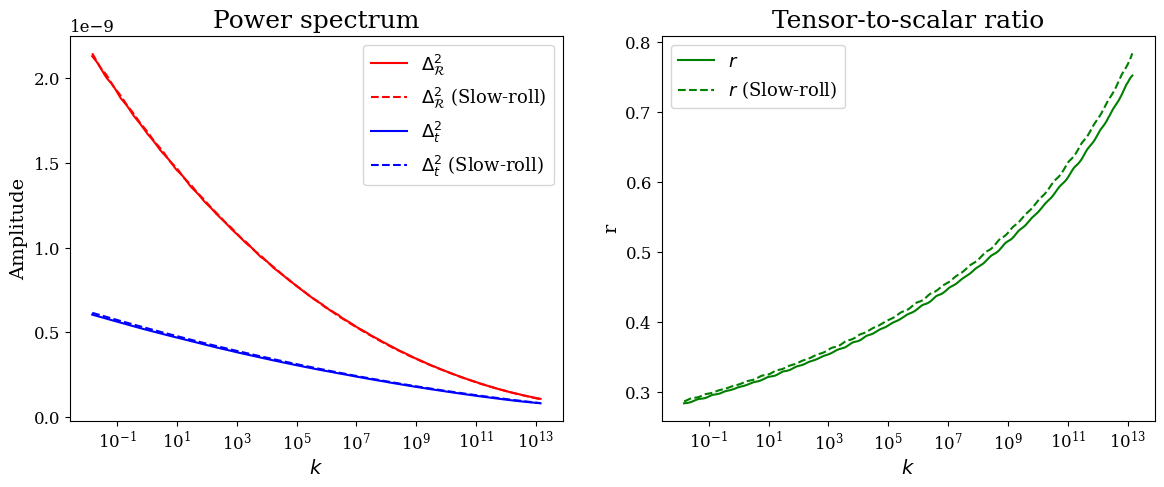

In [80]:
#Figure for the power spectrum
fig_ps = plt.figure()
fig_ps.set_figheight(5)
fig_ps.set_figwidth(14)
ax_ps = plt.subplot(1,2,1)
ax_tsr = plt.subplot(1,2,2)

ax_ps.semilogx(k_arr,P_R,color='r', linestyle='-',label=r'$\Delta^2_\mathcal{R}$')
ax_ps.semilogx(k_arr,P_R_SR,color='r', linestyle='--', label=r'$\Delta^2_\mathcal{R}$ (Slow-roll)')
ax_ps.semilogx(k_arr,P_t,color='b', linestyle='-',label=r'$\Delta^2_t$')
ax_ps.semilogx(k_arr,P_t_SR,color='b', linestyle='--', label=r'$\Delta^2_t$ (Slow-roll)')

ax_tsr.semilogx(k_arr,r,color='g', linestyle='-',label=r'$r$')
ax_tsr.semilogx(k_arr,r_SR,color='g', linestyle='--', label=r'$r$ (Slow-roll)')

ax_ps.set_xlabel(r'$k$', size=14)
ax_ps.set_ylabel('Amplitude', size=14)
ax_ps.set_title('Power spectrum', size=18)
ax_ps.legend(fontsize=13)

ax_tsr.set_xlabel(r'$k$', size=14)
ax_tsr.set_ylabel('r', size=14)
ax_tsr.set_title('Tensor-to-scalar ratio', size=18)
ax_tsr.legend(fontsize=13)

fig_ps.savefig('PowerSpectrum_Quartic.png')